In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering

In [164]:
data = pd.read_csv("./all_seasons.csv")
df = pd.DataFrame(data)

In [165]:
df.head()

Unnamed: 0        player_name team_abbreviation  age  player_height  \
0           0      Dennis Rodman               CHI   36         198.12   
1           1  Dwayne Schintzius               LAC   28         215.90   
2           2       Earl Cureton               TOR   39         205.74   
3           3        Ed O'Bannon               DAL   24         203.20   
4           4        Ed Pinckney               MIA   34         205.74   

   player_weight                      college country  draft_year  \
0      99.790240  Southeastern Oklahoma State     USA      1986.0   
1     117.933920                      Florida     USA      1990.0   
2      95.254320                Detroit Mercy     USA      1979.0   
3     100.697424                         UCLA     USA      1995.0   
4     108.862080                    Villanova     USA      1985.0   

   draft_round  ...  pts   reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  \
0          2.0  ...  5.7  16.1  3.1        16.1     0.186     0.323    0.100   
1          1.0  ...  2.3   1.5  0.3        12.3     0.078     0.151    0.175   
2          3.0  ...  0.8   1.0  0.4        -2.1     0.105     0.102    0.103   
3          1.0  ...  3.7   2.3  0.6        -8.7     0.060     0.149    0.167   
4          1.0  ...  2.4   2.4  0.2       -11.2     0.109     0.179    0.127   

   ts_pct  ast_pct   season  
0   0.479    0.113  1996-97  
1   0.430    0.048  1996-97  
2   0.376    0.148  1996-97  
3   0.399    0.077  1996-97  
4   0.611    0.040  1996-97  

[5 rows x 22 columns]

In [166]:
df.isnull().sum()

Unnamed: 0              0
player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college                 0
country                 0
draft_year           1942
draft_round          1959
draft_number         1959
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64

In [167]:
df.shape

(11145, 22)

In [168]:
df = df.dropna(axis=0)
df.head(10)

Unnamed: 0        player_name team_abbreviation  age  player_height  \
0            0      Dennis Rodman               CHI   36         198.12   
1            1  Dwayne Schintzius               LAC   28         215.90   
2            2       Earl Cureton               TOR   39         205.74   
3            3        Ed O'Bannon               DAL   24         203.20   
4            4        Ed Pinckney               MIA   34         205.74   
5            5      Eddie Johnson               HOU   38         200.66   
6            6        Eddie Jones               LAL   25         198.12   
7            7     Elden Campbell               LAL   28         213.36   
9            9       Elliot Perry               MIL   28         182.88   
10          10      Elmer Bennett               DEN   27         182.88   

    player_weight                      college country  draft_year  \
0       99.790240  Southeastern Oklahoma State     USA      1986.0   
1      117.933920                      Florida     USA      1990.0   
2       95.254320                Detroit Mercy     USA      1979.0   
3      100.697424                         UCLA     USA      1995.0   
4      108.862080                    Villanova     USA      1985.0   
5       97.522280                     Illinois     USA      1981.0   
6       86.182480                       Temple     USA      1994.0   
7      113.398000                      Clemson     USA      1990.0   
9       72.574720                      Memphis     USA      1991.0   
10      77.110640                   Notre Dame     USA      1992.0   

    draft_round  ...   pts   reb  ast  net_rating  oreb_pct  dreb_pct  \
0           2.0  ...   5.7  16.1  3.1        16.1     0.186     0.323   
1           1.0  ...   2.3   1.5  0.3        12.3     0.078     0.151   
2           3.0  ...   0.8   1.0  0.4        -2.1     0.105     0.102   
3           1.0  ...   3.7   2.3  0.6        -8.7     0.060     0.149   
4           1.0  ...   2.4   2.4  0.2       -11.2     0.109     0.179   
5           2.0  ...   8.2   2.7  1.0         4.1     0.034     0.126   
6           1.0  ...  17.2   4.1  3.4         4.1     0.035     0.091   
7           1.0  ...  14.9   8.0  1.6         3.3     0.095     0.183   
9           2.0  ...   6.9   1.5  3.0        -1.2     0.018     0.081   
10          2.0  ...   2.4   0.4  1.2        -7.4     0.000     0.053   

    usg_pct  ts_pct  ast_pct   season  
0     0.100   0.479    0.113  1996-97  
1     0.175   0.430    0.048  1996-97  
2     0.103   0.376    0.148  1996-97  
3     0.167   0.399    0.077  1996-97  
4     0.127   0.611    0.040  1996-97  
5     0.220   0.541    0.102  1996-97  
6     0.209   0.559    0.149  1996-97  
7     0.222   0.520    0.087  1996-97  
9     0.177   0.557    0.262  1996-97  
10    0.187   0.470    0.216  1996-97  

[10 rows x 22 columns]

In [169]:
df.isnull().sum()

Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [170]:
df_ = df.drop(['Unnamed: 0', 'player_name', 'team_abbreviation', 'college', 'country', 'draft_year', 'season', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'], axis= 1)
df_.head()

age  player_height  player_weight  draft_round  draft_number  gp  pts  \
0   36         198.12      99.790240          2.0          27.0  55  5.7   
1   28         215.90     117.933920          1.0          24.0  15  2.3   
2   39         205.74      95.254320          3.0          58.0   9  0.8   
3   24         203.20     100.697424          1.0           9.0  64  3.7   
4   34         205.74     108.862080          1.0          10.0  27  2.4   

    reb  ast  
0  16.1  3.1  
1   1.5  0.3  
2   1.0  0.4  
3   2.3  0.6  
4   2.4  0.2

<AxesSubplot:>

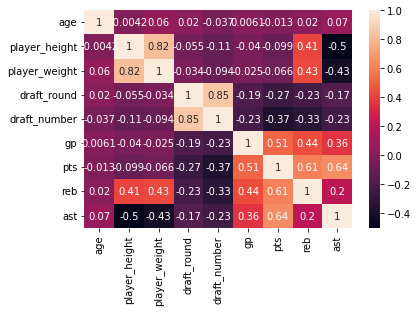

In [171]:
df_corr = df_.corr()
sns.heatmap(df_corr, annot= True)

<AxesSubplot:xlabel='player_height', ylabel='player_weight'>

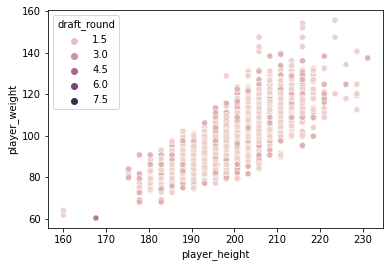

In [172]:
sns.scatterplot(x='player_height', y='player_weight', hue='draft_round', data=df_)

In [173]:
short_df = df_[df_['draft_round'] <= 3]
short_df.head()

age  player_height  player_weight  draft_round  draft_number  gp  pts  \
0   36         198.12      99.790240          2.0          27.0  55  5.7   
1   28         215.90     117.933920          1.0          24.0  15  2.3   
2   39         205.74      95.254320          3.0          58.0   9  0.8   
3   24         203.20     100.697424          1.0           9.0  64  3.7   
4   34         205.74     108.862080          1.0          10.0  27  2.4   

    reb  ast  
0  16.1  3.1  
1   1.5  0.3  
2   1.0  0.4  
3   2.3  0.6  
4   2.4  0.2

In [174]:
short_df.shape

(9162, 9)

<AxesSubplot:xlabel='player_height', ylabel='player_weight'>

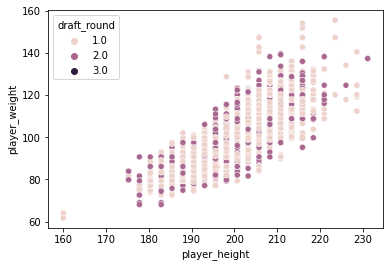

In [175]:
sns.scatterplot(x='player_height', y='player_weight', hue='draft_round', data=short_df)

In [202]:
short_df.dtypes

age                int64
player_height    float64
player_weight    float64
draft_round      float64
draft_number     float64
gp                 int64
pts              float64
reb              float64
ast              float64
dtype: object

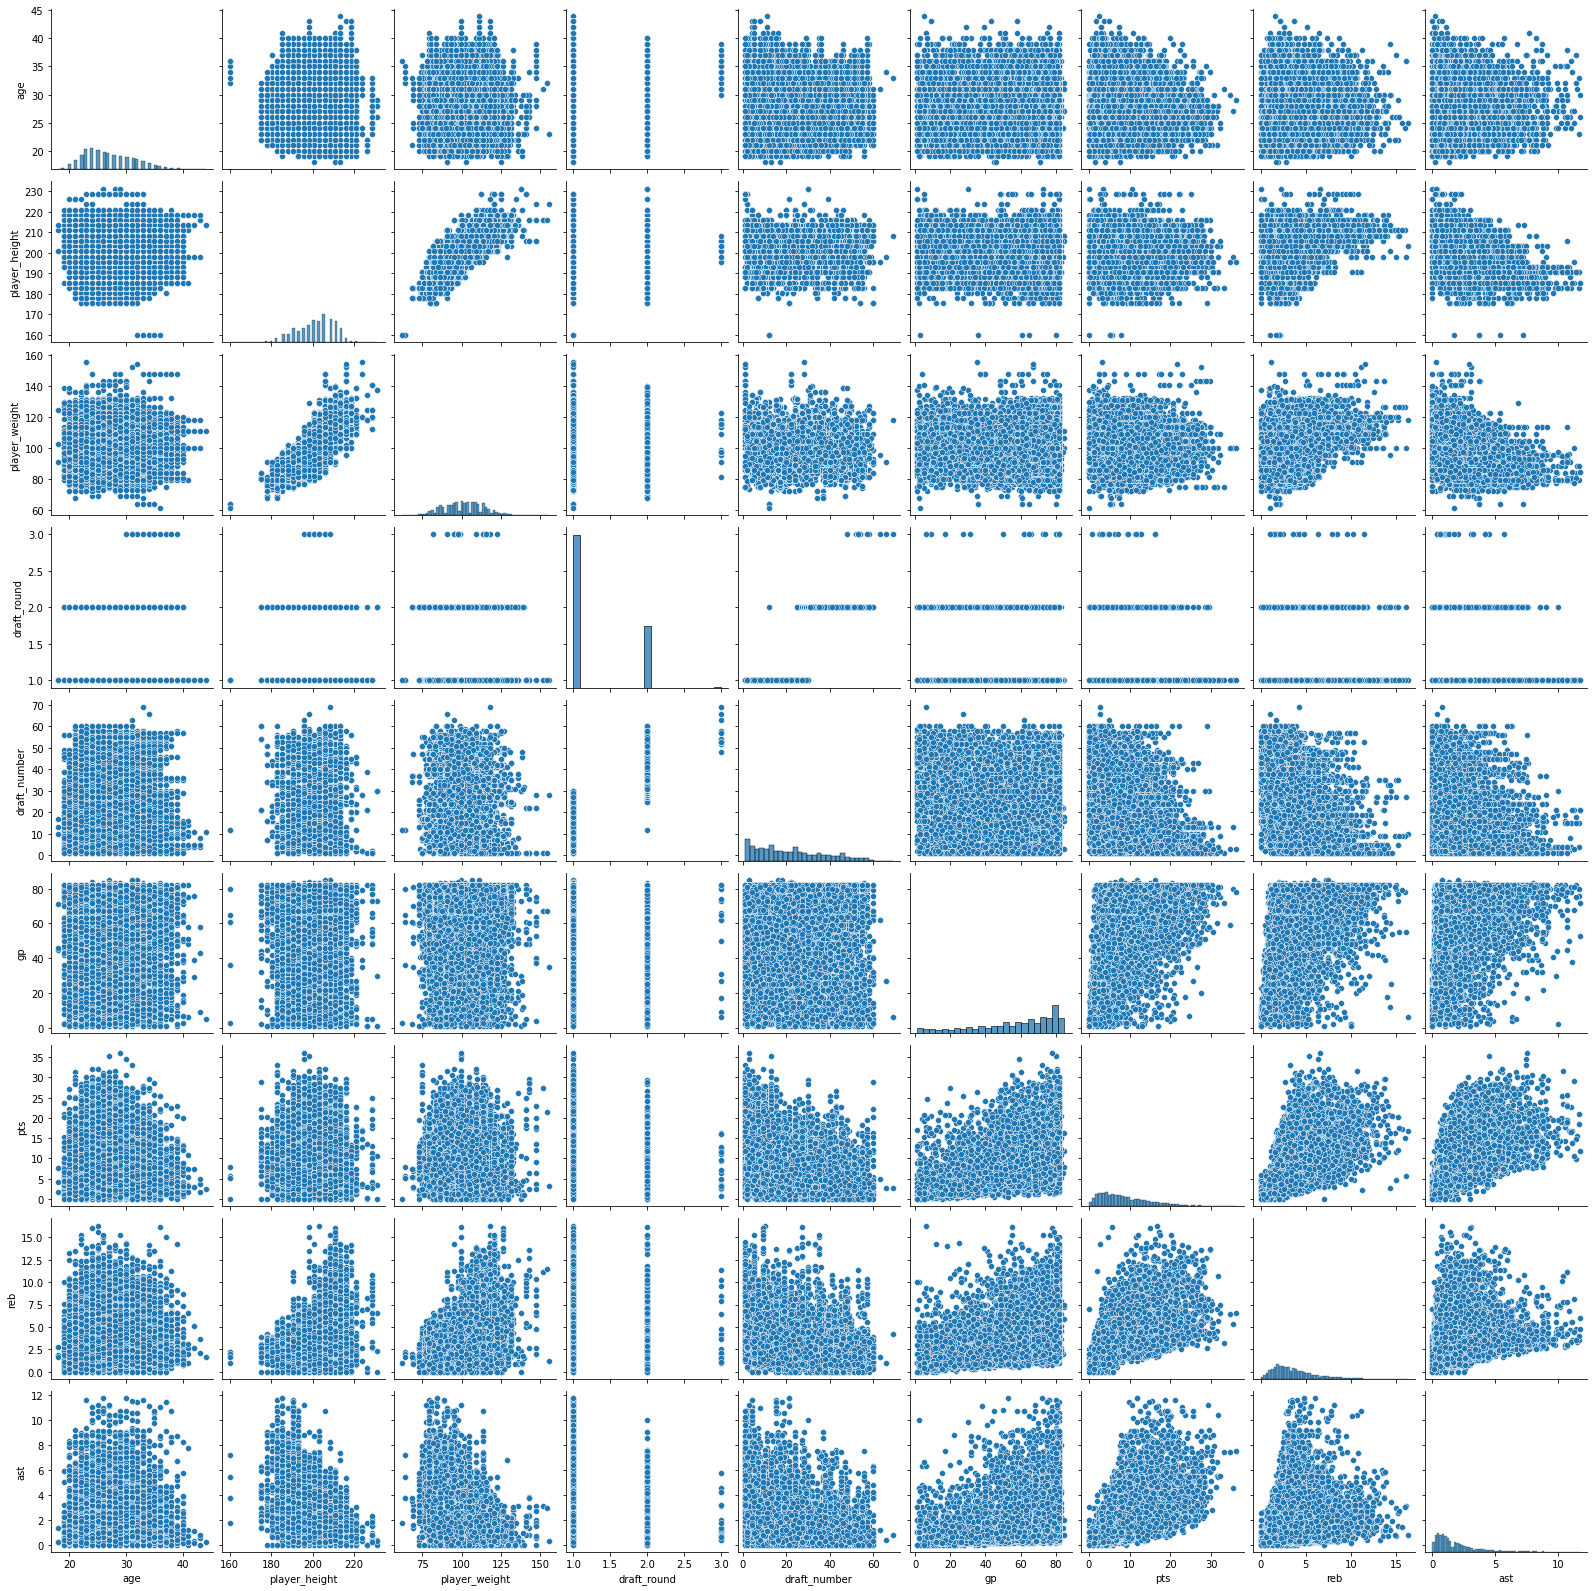

In [177]:
sns.pairplot(short_df)

In [178]:
pca = PCA(n_components = 2)
pca_mdl = pca.fit_transform(short_df)
pca_df = pd.DataFrame(pca_mdl)

In [179]:
pca_df.shape

(9162, 2)

<AxesSubplot:xlabel='0', ylabel='1'>

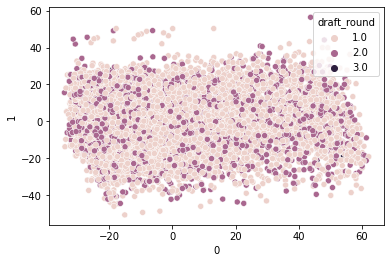

In [180]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue= short_df.draft_round)

<AxesSubplot:xlabel='0', ylabel='1'>

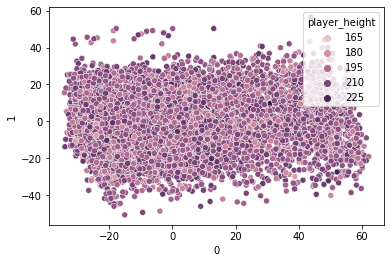

In [181]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue= short_df.player_height)

<AxesSubplot:xlabel='0', ylabel='1'>

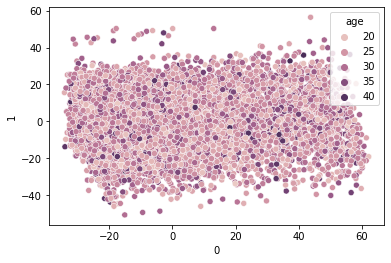

In [182]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue= short_df.age)

In [183]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(short_df)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, 'Variance')

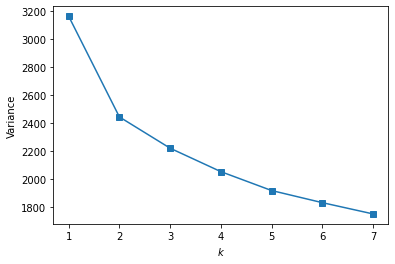

In [184]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

In [185]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(short_df)
y = kmeans.fit_predict(short_df)

<AxesSubplot:xlabel='0', ylabel='1'>

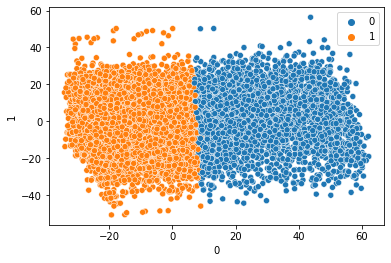

In [186]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

<AxesSubplot:xlabel='player_height', ylabel='player_weight'>

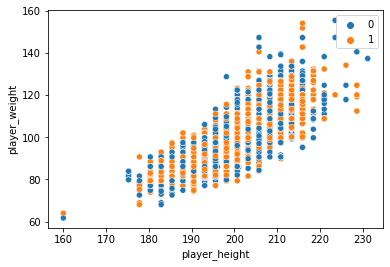

In [187]:
sns.scatterplot(x = short_df['player_height'], y = short_df['player_weight'], hue=y)

<AxesSubplot:xlabel='age', ylabel='gp'>

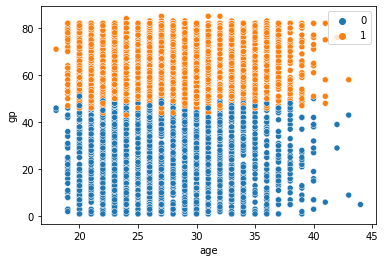

In [188]:
sns.scatterplot(x = short_df['age'], y = short_df['gp'], hue=y)

<AxesSubplot:xlabel='player_weight', ylabel='pts'>

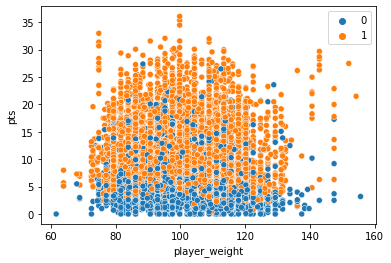

In [189]:
sns.scatterplot(x = short_df['player_weight'], y = short_df['pts'], hue=y)

<AxesSubplot:xlabel='age', ylabel='draft_round'>

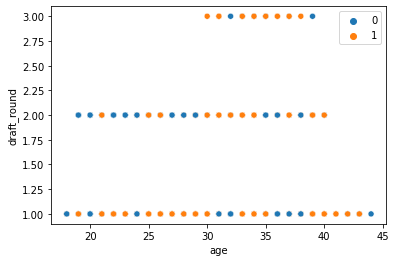

In [190]:
sns.scatterplot(x = short_df['age'], y = short_df['draft_round'], hue=y)

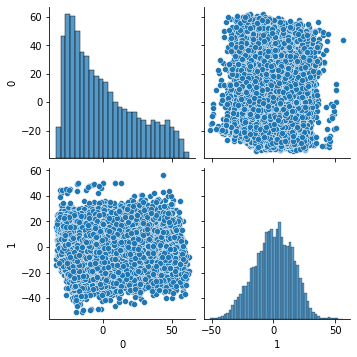

In [191]:
sns.pairplot(pca_df)

In [192]:
agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_agglo = agglo.fit_predict(short_df)

<AxesSubplot:xlabel='0', ylabel='1'>

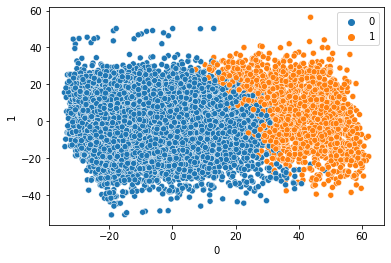

In [193]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y_agglo)

<AxesSubplot:xlabel='player_height', ylabel='player_weight'>

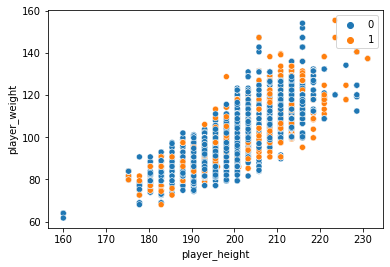

In [194]:
sns.scatterplot(x = short_df['player_height'], y = short_df['player_weight'], hue=y_agglo)

<AxesSubplot:xlabel='age', ylabel='gp'>

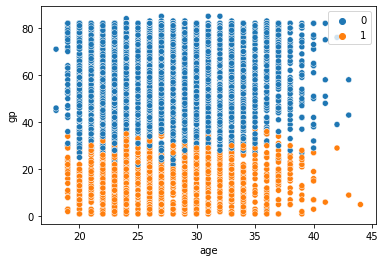

In [195]:
sns.scatterplot(x = short_df['age'], y = short_df['gp'], hue=y_agglo)

In [196]:
import plotly.express as px

In [197]:
pca_df

0          1
0      1.092606  -5.107469
1     40.499772  20.192492
2     54.100542 -19.018575
3    -10.605390   6.792300
4     25.396421  18.121582
...         ...        ...
9157   4.403185  12.516633
9158  -0.643449  -8.135536
9159  -4.827635   2.236539
9160  42.869755  -7.942364
9161   4.043446  22.719846

[9162 rows x 2 columns]

In [198]:
y_df = pd.DataFrame(y, columns=['Cluster'])
show_df = pd.concat([short_df, y_df], axis = 1)

In [199]:
fig = px.scatter(pd.concat([show_df, pca_df], axis = 1), 
                 x = 0, y = 1, color= 'Cluster', hover_data=['player_height','player_weight','draft_round'])
fig.show()

In [200]:
y_agglo_df = pd.DataFrame(y_agglo, columns=['Cluster'])
agglo_df = pd.concat([short_df, y_agglo_df], axis = 1)

In [201]:
fig = px.scatter(pd.concat([agglo_df, pca_df], axis = 1), 
                 x = 0, y = 1, color= 'Cluster', hover_data=['player_height','player_weight','draft_round'])
fig.show()